<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 19: Optimizers
### Notebook 2: Accuracy in splitting a 1D data set

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is still in the hacked-together form used to develop the figures, and is only lightly commented.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap

import math
import numpy as np
import seaborn as sbn; sbn.set()

In [2]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.labelpad'] = 8
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14

In [4]:
def make_dot_data(points_per_side = 20):
    np.random.seed(42)
    left_data = np.random.uniform(-5, -.01, size=points_per_side)
    right_data = np.random.uniform(-.01, 5, size=points_per_side)
    dot_X = np.ravel([left_data, right_data])
    dot_y = np.ravel([[0]*points_per_side, [1]*points_per_side])
    return (dot_X, dot_y)

In [5]:
def draw_dot_data(ax, dot_X, dot_y, y_val):  
    cm = LinearSegmentedColormap.from_list('mymap', ['#1C5BA8', '#D6A234'])
    xmin = np.min(dot_X) - 1
    xmax = np.max(dot_X) + 1
    ax.plot([xmin, xmax], [y_val, y_val], color='black', linewidth=1, zorder=10)
    ax.scatter(dot_X, [y_val]*len(dot_X), c=dot_y, s=80, cmap=cm, zorder=20)

In [6]:
def draw_dot_data_figure(dot_X, dot_y):
    plt.figure(figsize=(8,1))
    ax = plt.gca()
    draw_dot_data(ax, dot_X, dot_y, 0)
    plt.xlim(np.min(dot_X)-.5, np.max(dot_X)+.5)
    plt.yticks([],[])
    file_helper.save_figure('dot-data')
    plt.show()

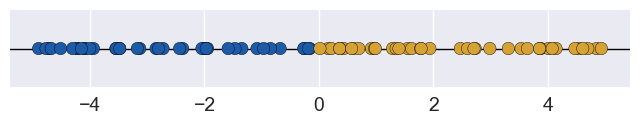

In [7]:
(dot_X, dot_y) = make_dot_data(points_per_side = 40)
draw_dot_data_figure(dot_X, dot_y)

In [8]:
# this filter throws a warning about a library incompatibility, but it works
from scipy.signal import savgol_filter

def draw_dot_data_curve(ax, dot_X, dot_y, smooth=False):
    val_list = np.linspace(np.min(dot_X)-1, np.max(dot_X)+1, 200)
    yvals = []
    for v in val_list:
        total_error = 0
        for x,y in zip(dot_X, dot_y):
            if ((x < v) and (y == 1)) or ((x > v) and (y == 0)):
                    total_error += 1
        yvals.append(total_error)
    yrange = (np.min(yvals), np.max(yvals))
    if smooth:
        yvals = savgol_filter(yvals, 51, 3) # window size 51, polynomial order 3
    yvals = np.interp(yvals, (np.min(yvals), np.max(yvals)), (0,1))
    ax.plot(val_list, yvals)
    return yrange

In [9]:
def draw_dot_data_and_curve(dot_X, dot_y, smooth=False):
    ax = plt.gca()
    (ymin, ymax) = draw_dot_data_curve(ax, dot_X, dot_y, smooth)
    plt.ylim(-.5, 1.1)
    draw_dot_data(ax, dot_X, dot_y, -.25)
    plt.xlim(np.min(dot_X)-.5, np.max(dot_X)+.5)
    plt.yticks([0, 1.1],(ymin, ymax))
    plt.ylabel('error')
    plt.xlabel('dividing point position')
    file_helper.save_figure('dot-data-and-curve-smooth-'+str(smooth))
    plt.show()

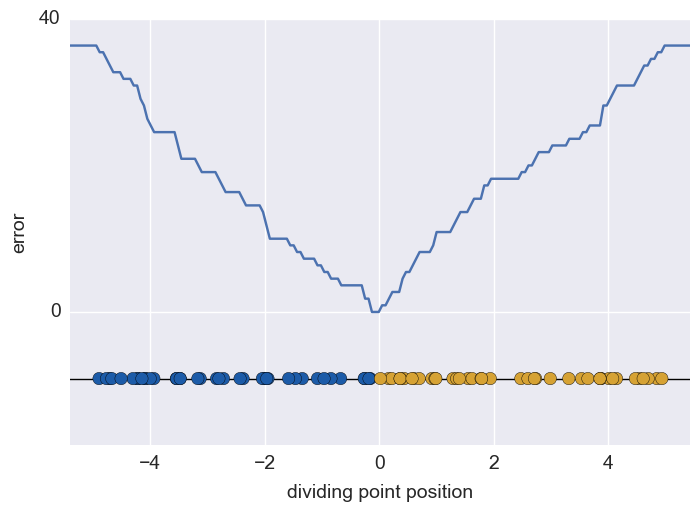

In [10]:
draw_dot_data_and_curve(dot_X, dot_y, smooth=False)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


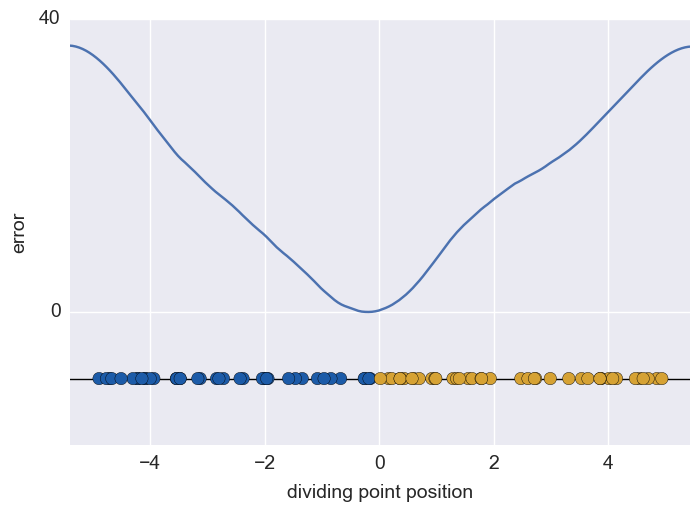

In [11]:
draw_dot_data_and_curve(dot_X, dot_y, smooth=True)